This notebook is based on [this original Kaggle notebook](https://www.kaggle.com/code/jchen2186/machine-learning-with-iris-dataset/notebook) by Jane

In [1]:
from src import utils
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import mlflow
import mlflow.sklearn

In [2]:
TRACKING_URI = 'file:../mlruns'
mlflow.set_tracking_uri(TRACKING_URI)

In [3]:
from urllib.parse import urlparse
urlparse(mlflow.get_tracking_uri()).scheme

'file'

# Load Data

In [4]:
utils.download_data()
data = pd.read_csv('../data/iris.csv', header=None)
data.columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Modeling with scikit-learn

In [5]:
X = data.drop(['Species'], axis=1)
y = data['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


## Train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


### KNN and Logistic regression

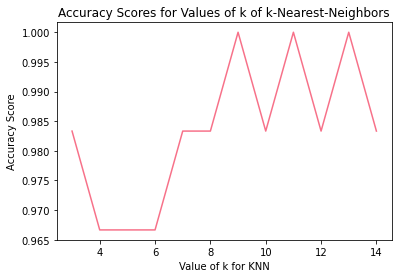

In [7]:
## KNN
# experimenting with different k values
k_range = list(range(3,15))
scores = []
for k in k_range:
    with mlflow.start_run():
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        scores.append(accuracy)

        # track with MLflow
        mlflow.log_param('k', k)
        mlflow.log_metric('accuracy', accuracy)
        mlflow.sklearn.log_model(
            sk_model=knn, 
            artifact_path='model', 
            #registered_model_name='KNN'
            )

# plot knn accuracy for different k
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()       


### Logistic regression

In [8]:
with mlflow.start_run():
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f'accuracy: {accuracy}')

    # track with MLflow
    mlflow.log_metric('accuracy', accuracy)
    mlflow.sklearn.log_model(
        sk_model=logreg, 
        artifact_path='model', 
        #registered_model_name='LogReg'
        )

accuracy: 0.9833333333333333


In [9]:
# Check for any active runs (should be None if previous one was properly terminated)
print(f'Active run: {mlflow.active_run()}')

Active run: None


## Choosing KNN to Model Iris Species Prediction with k = 12
After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [10]:
# knn = KNeighborsClassifier(n_neighbors=12)
# knn.fit(X, y)

# # make a prediction for an example of an out-of-sample observation
# knn.predict([[6, 3, 4, 2]])